This file creates a sample dendrogram for the hierarchical clustering of the data.

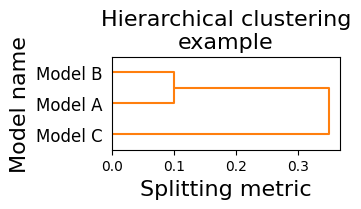

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

def hierarchical_clustering(df, title, output_filename=None, color_threshold=1.04):
    similarity_matrix = df.values
    distance_matrix = 1 - similarity_matrix
    condensed_dist_matrix = squareform(distance_matrix)
    Z = linkage(condensed_dist_matrix, method='average')
    plt.figure(figsize=(3.6,2.2))
    dendrogram(Z, labels=df.index, orientation='right', color_threshold=color_threshold) # threshold here matches 3 clusters
    plt.title(title, fontsize=16)
    plt.xlabel('Splitting metric', fontsize=16)
    plt.ylabel('Model name', fontsize=16)
    
    if output_filename:
        plt.tight_layout()
        plt.savefig(output_filename, dpi=600)
    plt.show()
    
    # clusters
    clusters = cut_tree(Z, n_clusters=3)
    clusters_df = pd.DataFrame(clusters, index=df.index, columns=['cluster'])
    clusters_df = clusters_df.sort_values(by='cluster')
    
    return Z, clusters_df


df = 1 - pd.DataFrame([[0, 0.1, 0.4], [0.1, 0, 0.3], [0.4, 0.3, 0]], 
                      index=['Model A', 'Model B', 'Model C'], columns=['Model A', 'Model B', 'Model C'])
hierarchical_clustering(df, title="Hierarchical clustering\nexample", output_filename='dendrogram_example.png');